In [41]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import math
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from math import acos, degrees

In [42]:
d = pd.read_csv(r'C:\Users\natal\Documents\3. Semester\HIWI\DLC 2.NL\dlc analysis nl\2.NL_right-NG-2020-03-04\200221_DSC010493_NL2DLC_resnet50_2.NL_rightMar4shuffle1_450000.csv', names=['bodyparts_coords', 'leftear_x', 'leftear_y', 'leftear_likelihood', 'rightear_x', 'rightear_y', 'rightear_likelihood', 'nose_x', 'nose_y', 'nose_likelihood', 'tailbase_x', 'tailbase_y', 'tailbase_likelihood', 'object1_x', 'object1_y', 'object1_likelihood', 'object2_x', 'object2_y', 'object2_likelihood','upperleft_x', 'upperleft_y', 'upperleft_likelihood', 'upperright_x', 'upperright_y', 'upperright_likelihood', 'lowerleft_x', 'lowerleft_y', 'lowerleft_likelihood', 'lowerright_x', 'lowerright_y', 'lowerright_likelihood'], skiprows=11)
framerate=30
d['time in s']=d['bodyparts_coords'] / framerate
d = d.iloc[:9011]
d

,bodyparts_coords,leftear_x,leftear_y,leftear_likelihood,rightear_x,rightear_y,rightear_likelihood,nose_x,nose_y,nose_likelihood,...,upperright_x,upperright_y,upperright_likelihood,lowerleft_x,lowerleft_y,lowerleft_likelihood,lowerright_x,lowerright_y,lowerright_likelihood,time in s
0,8,648.594238,176.462006,1.0,661.635803,183.618042,1.000000,662.684387,165.195755,1.0,...,709.259583,59.319946,0.999985,313.967163,441.680084,0.998693,687.298889,441.511353,0.998216,0.266667
1,9,652.596069,172.441559,1.0,666.385132,178.357452,1.000000,663.121399,160.276413,1.0,...,710.428223,59.991039,0.999976,314.050415,441.234619,0.999085,688.784607,441.380005,0.999709,0.300000
2,10,655.623291,167.820572,1.0,668.469055,173.717346,1.000000,664.089539,155.501343,1.0,...,710.364380,59.891914,0.999976,313.507294,441.588989,0.999339,688.727051,442.024933,0.999775,0.333333
3,11,657.706116,163.663986,1.0,671.762024,170.456070,1.000000,665.837219,153.569977,1.0,...,709.694397,59.809742,0.999975,313.722656,442.167969,0.999612,688.570251,442.161133,0.999754,0.366667
4,12,661.284607,160.541077,1.0,674.399780,167.526321,1.000000,669.042603,152.479523,1.0,...,709.454163,59.240231,0.999982,313.439056,442.018402,0.999512,688.863525,441.908661,0.999773,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9006,9014,445.369293,425.143463,1.0,440.697723,412.215118,0.999999,425.596863,422.323517,1.0,...,709.680115,58.204754,0.999921,312.269562,440.475433,0.998806,687.764404,442.229279,0.999494,300.466667
9007,9015,445.145599,424.604248,1.0,440.787567,411.257660,0.999999,425.594421,420.924469,1.0,...,709.726440,57.616497,0.999873,312.075684,440.064301,0.998679,687.882996,442.178223,0.999303,300.500000
9008,9016,443.600250,423.813080,1.0,440.406555,411.071075,0.999999,423.397247,418.509674,1.0,...,709.861389,58.052708,0.999864,312.427094,440.613739,0.998261,688.225281,442.037598,0.999220,300.533333
9009,9017,444.312744,423.551239,1.0,441.586578,410.165527,0.999999,424.225616,417.018402,1.0,...,709.891418,58.023731,0.999893,313.000488,441.588684,0.998126,688.146179,442.452911,0.999094,300.566667


In [43]:
#corners
upleft_x = d.loc[:,"upperleft_x"].median() 
upleft_y = d.loc[:,"upperleft_y"].median() 
upright_x = d.loc[:,"upperright_x"].median()
upright_y = d.loc[:,"upperright_y"].median()
lowleft_x = d.loc[:,"lowerleft_x"].median()
lowleft_y = d.loc[:,"lowerleft_y"].median()
lowright_x = d.loc[:,"lowerright_x"].median()
lowright_y = d.loc[:,"lowerright_y"].median()

#objects
object1_x = d.loc[:,"object1_x"].median()
object1_y = d.loc[:,"object1_y"].median()
object2_x = d.loc[:,"object2_x"].median()
object2_y = d.loc[:,"object2_y"].median()

In [44]:
# centroid of head
d['nose_x'] = d['nose_x'].astype(float)
d['leftear_x'] = d['leftear_x'].astype(float)
d['rightear_x'] = d['rightear_x'].astype(float)
d['nose_y'] = d['nose_y'].astype(float)
d['leftear_y'] = d['leftear_y'].astype(float)
d['rightear_y'] = d['rightear_y'].astype(float)

centroid_y= d[['nose_y', 'leftear_y', 'rightear_y']]
centroid_x= d[['nose_x', 'leftear_x', 'rightear_x']]

centroid_y['centroid_y'] = centroid_y.mean(axis=1)
centroid_x['centroid_x'] = centroid_x.mean(axis=1)
centroid = centroid_x['centroid_x'], centroid_y['centroid_y']
centroid = pd.DataFrame(centroid)
centroid = centroid.T
centroid

C:\Users\natal\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\natal\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,centroid_x,centroid_y
0,657.638143,175.091934
1,660.700867,170.358475
2,662.727295,165.679754
3,665.101786,162.563344
4,668.242330,160.182307
...,...,...
9006,437.221293,419.894033
9007,437.175863,418.928792
9008,435.801351,417.797943
9009,436.708313,416.911723


In [45]:
#change in position 
centroid['old_position_x'] = centroid['centroid_x'].shift(1)
centroid['old_position_y'] = centroid['centroid_y'].shift(1)

centroid['change_in_distance_x'] = abs(centroid['centroid_x'] - centroid['old_position_x'])
centroid['change_in_distance_y'] = abs(centroid['centroid_y'] - centroid['old_position_y'])

#pixel to cm
centroid_x_max = centroid['centroid_x'].max()
centroid_x_min = centroid['centroid_x'].min()
centroid_y_max = centroid['centroid_y'].max()
centroid_y_min = centroid['centroid_y'].min()

centroid['object1_x'] = d['object1_x']
centroid['object1_y'] = d['object1_y']
centroid['object2_x'] = d['object2_x']
centroid['object2_y'] = d['object2_y']

px = (((centroid_x_max - centroid_x_min) + (centroid_y_max - centroid_y_min)) / 2 ) / 45

#body center
centroid['bodycenter_x'] = abs((centroid['centroid_x'] + d['tailbase_x']) / 2)
centroid['bodycenter_y'] = abs((centroid['centroid_y'] + d['tailbase_y']) / 2)
centroid = centroid / px
centroid

,centroid_x,centroid_y,old_position_x,old_position_y,change_in_distance_x,change_in_distance_y,object1_x,object1_y,object2_x,object2_y,bodycenter_x,bodycenter_y
0,72.705773,19.357445,NaN,NaN,NaN,NaN,43.911659,16.573065,55.846260,38.412225,70.981416,22.611739
1,73.044375,18.834134,72.705773,19.357445,0.338602,0.523312,43.904709,16.576802,55.815858,38.404627,71.333239,22.030644
2,73.268409,18.316873,73.044375,18.834134,0.224034,0.517260,43.886699,16.576027,55.817204,38.433690,71.551081,21.510904
3,73.530923,17.972336,73.268409,18.316873,0.262514,0.344537,43.868203,16.599820,55.822032,38.435576,71.737532,21.053450
4,73.878128,17.709098,73.530923,17.972336,0.347206,0.263238,43.871196,16.576172,55.822447,38.428902,71.878532,20.665731
...,...,...,...,...,...,...,...,...,...,...,...,...
9006,48.337391,46.421760,48.195614,46.540259,0.141777,0.118499,43.960887,16.684066,55.896227,38.400835,51.474087,45.465806
9007,48.332368,46.315047,48.337391,46.421760,0.005023,0.106713,43.965213,16.685672,55.901882,38.403436,51.471462,45.408071
9008,48.180408,46.190025,48.332368,46.315047,0.151960,0.125022,43.980226,16.686382,55.874759,38.346900,51.400831,45.357949
9009,48.280678,46.092048,48.180408,46.190025,0.100270,0.097977,43.968485,16.690708,55.914463,38.415579,51.461471,45.358959


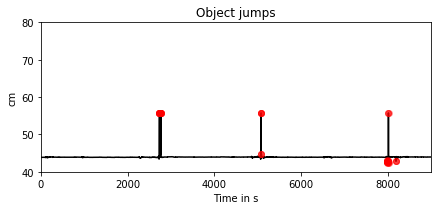

In [46]:
#detect jumps on labels of object coordinates (thresholds made individually)

def get_median_filtered(signal, threshold=100):
    signal = signal.copy()
    difference = np.abs(signal - np.median(signal))
    median_difference = np.median(difference)
    if median_difference == 0:
        s = 0
    else:
        s = difference / float(median_difference)
    mask = s > threshold
    signal[mask] = np.median(signal)
    return signal

figsize = (7, 2.75)
kw = dict(marker='o', linestyle='none', color='r', alpha=0.3)

centroid['object1_x1'] = get_median_filtered(centroid['object1_x'].values, threshold=30)

outlier_idx_1x = np.where(centroid['object1_x1'].values != centroid['object1_x'].values)[0]

fig, ax = plt.subplots(figsize=figsize)
centroid['object1_x'].plot(color = 'black')
centroid['object1_x'][outlier_idx_1x].plot(**kw)
plt.xlabel('Time in s')
plt.ylabel('cm')
plt.title('Object jumps')
_ = ax.set_ylim(40, 80)

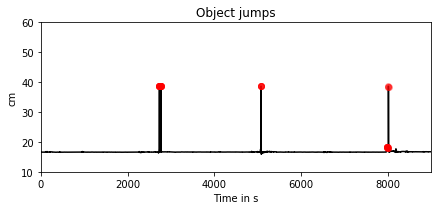

In [47]:
#detect jumps on labels of object1_y

figsize = (7, 2.75)
kw = dict(marker='o', linestyle='none', color='r', alpha=0.3)

centroid['object1_y1'] = get_median_filtered(centroid['object1_y'].values, threshold=60)

outlier_idx_1y = np.where(centroid['object1_y1'].values != centroid['object1_y'].values)[0]

fig, ax = plt.subplots(figsize=figsize)
centroid['object1_y'].plot(color = 'black')
centroid['object1_y'][outlier_idx_1y].plot(**kw)
plt.xlabel('Time in s')
plt.ylabel('cm')
plt.title('Object jumps')
_ = ax.set_ylim(10, 60)

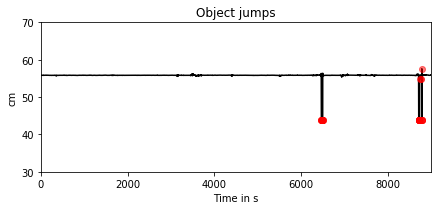

In [48]:
figsize = (7, 2.75)
kw = dict(marker='o', linestyle='none', color='r', alpha=0.3)

centroid['object2_x2'] = get_median_filtered(centroid['object2_x'].values, threshold=70)

outlier_idx_2x = np.where(centroid['object2_x2'].values != centroid['object2_x'].values)[0]

fig, ax = plt.subplots(figsize=figsize)
centroid['object2_x'].plot(color = 'black')
centroid['object2_x'][outlier_idx_2x].plot(**kw)
plt.xlabel('Time in s')
plt.ylabel('cm')
plt.title('Object jumps')
_ = ax.set_ylim(30, 70)

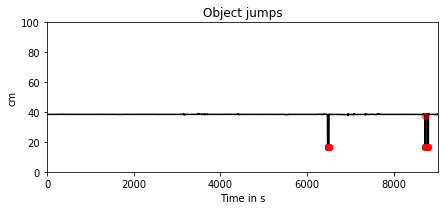

In [49]:
figsize = (7, 2.75)
kw = dict(marker='o', linestyle='none', color='r', alpha=0.3)

centroid['object2_y2'] = get_median_filtered(centroid['object2_y'].values, threshold=70)

outlier_idx_2y = np.where(centroid['object2_y2'].values != centroid['object2_y'].values)[0]

fig, ax = plt.subplots(figsize=figsize)
centroid['object2_y'].plot(color = 'black')
centroid['object2_y'][outlier_idx_2y].plot(**kw)
plt.xlabel('Time in s')
plt.ylabel('cm')
plt.title('Object jumps')
_ = ax.set_ylim(0, 100)

In [50]:
#remove jumps in object
centroid.loc[centroid.index.isin(outlier_idx_1x), 'object1_x'] = np.nan
centroid.loc[centroid.index.isin(outlier_idx_1y), 'object1_y'] = np.nan
centroid.loc[centroid.index.isin(outlier_idx_2x), 'object2_x'] = np.nan
centroid.loc[centroid.index.isin(outlier_idx_2y), 'object2_y'] = np.nan

centroid = centroid.interpolate(method = 'linear')
del centroid['object1_x1']
del centroid['object1_y1']
del centroid['object2_x2']
del centroid['object2_y2']
centroid

,centroid_x,centroid_y,old_position_x,old_position_y,change_in_distance_x,change_in_distance_y,object1_x,object1_y,object2_x,object2_y,bodycenter_x,bodycenter_y
0,72.705773,19.357445,NaN,NaN,NaN,NaN,43.911659,16.573065,55.846260,38.412225,70.981416,22.611739
1,73.044375,18.834134,72.705773,19.357445,0.338602,0.523312,43.904709,16.576802,55.815858,38.404627,71.333239,22.030644
2,73.268409,18.316873,73.044375,18.834134,0.224034,0.517260,43.886699,16.576027,55.817204,38.433690,71.551081,21.510904
3,73.530923,17.972336,73.268409,18.316873,0.262514,0.344537,43.868203,16.599820,55.822032,38.435576,71.737532,21.053450
4,73.878128,17.709098,73.530923,17.972336,0.347206,0.263238,43.871196,16.576172,55.822447,38.428902,71.878532,20.665731
...,...,...,...,...,...,...,...,...,...,...,...,...
9006,48.337391,46.421760,48.195614,46.540259,0.141777,0.118499,43.960887,16.684066,55.896227,38.400835,51.474087,45.465806
9007,48.332368,46.315047,48.337391,46.421760,0.005023,0.106713,43.965213,16.685672,55.901882,38.403436,51.471462,45.408071
9008,48.180408,46.190025,48.332368,46.315047,0.151960,0.125022,43.980226,16.686382,55.874759,38.346900,51.400831,45.357949
9009,48.280678,46.092048,48.180408,46.190025,0.100270,0.097977,43.968485,16.690708,55.914463,38.415579,51.461471,45.358959


In [51]:
centroid['middle_x'] = abs((d['leftear_x']+d['rightear_x']) / 2)
centroid['middle_y'] = abs((d['leftear_y']+d['rightear_y']) /2)
centroid['object11_x'] = centroid['object1_x'] * px
centroid['object11_y'] = centroid['object1_y'] * px
centroid['object22_x'] = centroid['object2_x'] * px
centroid['object22_y'] = centroid['object2_y'] * px
centroid['nose_x'] = d['nose_x']
centroid['nose_y'] = d['nose_y']
centroid.head(10)

,centroid_x,centroid_y,old_position_x,old_position_y,change_in_distance_x,change_in_distance_y,object1_x,object1_y,object2_x,object2_y,bodycenter_x,bodycenter_y,middle_x,middle_y,object11_x,object11_y,object22_x,object22_y,nose_x,nose_y
0,72.705773,19.357445,NaN,NaN,NaN,NaN,43.911659,16.573065,55.846260,38.412225,70.981416,22.611739,655.115021,180.040024,397.189667,149.906662,505.140503,347.446198,662.684387,165.195755
1,73.044375,18.834134,72.705773,19.357445,0.338602,0.523312,43.904709,16.576802,55.815858,38.404627,71.333239,22.030644,659.490601,175.399506,397.126801,149.940460,504.865509,347.377472,663.121399,160.276413
2,73.268409,18.316873,73.044375,18.834134,0.224034,0.517260,43.886699,16.576027,55.817204,38.433690,71.551081,21.510904,662.046173,170.768959,396.963898,149.933456,504.877686,347.640350,664.089539,155.501343
3,73.530923,17.972336,73.268409,18.316873,0.262514,0.344537,43.868203,16.599820,55.822032,38.435576,71.737532,21.053450,664.734070,167.060028,396.796600,150.148666,504.921356,347.657410,665.837219,153.569977
4,73.878128,17.709098,73.530923,17.972336,0.347206,0.263238,43.871196,16.576172,55.822447,38.428902,71.878532,20.665731,667.842194,164.033699,396.823669,149.934769,504.925110,347.597046,669.042603,152.479523
5,74.049738,17.444717,73.878128,17.709098,0.171610,0.264381,43.863706,16.563341,55.826904,38.431294,71.938760,20.481480,668.897156,161.849800,396.755920,149.818710,504.965424,347.618683,671.589417,149.673187
6,74.044743,17.076308,74.049738,17.444717,0.004996,0.368409,43.854863,16.568104,55.825295,38.449115,72.014769,20.268854,668.836060,158.746994,396.675934,149.861786,504.950867,347.779877,671.576050,145.881790
7,74.047107,16.837919,74.044743,17.076308,0.002364,0.238389,43.846654,16.594292,55.821523,38.451622,72.182453,20.088354,668.507843,157.656929,396.601685,150.098663,504.916748,347.802551,672.296631,141.593094
8,73.978122,16.458967,74.047107,16.837919,0.068985,0.378952,43.843391,16.568239,55.822035,38.426918,72.242015,19.794997,668.014313,154.122482,396.572174,149.863007,504.921387,347.579102,671.411743,138.378891
9,74.143962,15.777855,73.978122,16.458967,0.165841,0.681112,43.858648,16.543732,55.825649,38.432573,72.466069,19.213621,670.215240,147.670395,396.710175,149.641342,504.954071,347.630249,671.510071,132.800690


In [52]:
#angles for object 1
angles=[]
for i in range(centroid.shape[0]):
    p0 = [centroid.nose_x[i],centroid.nose_y[i]] 
    p1 = [centroid.middle_x[i],centroid.middle_y[i]] 
    p2 = [centroid.object11_x[i],centroid.object11_y[i]] 

    v0 = np.array(p0) - np.array(p1) 
    v1 = np.array(p2) - np.array(p1) 
    
    angle = abs(degrees(np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))))
    
    if angle != 0 or angle !=180:
        angles.append(round(angle,2))          
    else:
        if np.sign(v0) != np.sign(v1):
            angles.append(180)
        else:
            angles.append(0)
            
centroid['Angles1']=angles

In [53]:
#angles for object 2
angles2=[]
for i in range(centroid.shape[0]):
    p0 = [centroid.nose_x[i],centroid.nose_y[i]] 
    p1 = [centroid.middle_x[i],centroid.middle_y[i]] 
    p2 = [centroid.object22_x[i],centroid.object22_y[i]] 

    v0 = np.array(p0) - np.array(p1) 
    v1 = np.array(p2) - np.array(p1) 
    
    angle2 = abs(degrees(np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))))
    
    if angle2 != 0 or angle2 !=180:
        angles2.append(round(angle2,2))
        
    else:
        if np.sign(v0) != np.sign(v1):
            angles2.append(180)
        else:
            angles2.append(0)
centroid['Angles2']=angles2

del centroid['middle_x']
del centroid['middle_y']
del centroid['object22_y']
del centroid['object22_x']
del centroid['object11_y']
del centroid['object11_x']
centroid

,centroid_x,centroid_y,old_position_x,old_position_y,change_in_distance_x,change_in_distance_y,object1_x,object1_y,object2_x,object2_y,bodycenter_x,bodycenter_y,nose_x,nose_y,Angles1,Angles2
0,72.705773,19.357445,NaN,NaN,NaN,NaN,43.911659,16.573065,55.846260,38.412225,70.981416,22.611739,662.684387,165.195755,110.35,165.16
1,73.044375,18.834134,72.705773,19.357445,0.338602,0.523312,43.904709,16.576802,55.815858,38.404627,71.333239,22.030644,663.121399,160.276413,97.96,151.54
2,73.268409,18.316873,73.044375,18.834134,0.224034,0.517260,43.886699,16.576027,55.817204,38.433690,71.551081,21.510904,664.089539,155.501343,93.13,146.00
3,73.530923,17.972336,73.268409,18.316873,0.262514,0.344537,43.868203,16.599820,55.822032,38.435576,71.737532,21.053450,665.837219,153.569977,91.06,143.17
4,73.878128,17.709098,73.530923,17.972336,0.347206,0.263238,43.871196,16.576172,55.822447,38.428902,71.878532,20.665731,669.042603,152.479523,92.95,144.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9006,48.337391,46.421760,48.195614,46.540259,0.141777,0.118499,43.960887,16.684066,55.896227,38.400835,51.474087,45.465806,425.596863,422.323517,92.18,143.05
9007,48.332368,46.315047,48.337391,46.421760,0.005023,0.106713,43.965213,16.685672,55.901882,38.403436,51.471462,45.408071,425.594421,420.924469,90.15,141.39
9008,48.180408,46.190025,48.332368,46.315047,0.151960,0.125022,43.980226,16.686382,55.874759,38.346900,51.400831,45.357949,423.397247,418.509674,83.87,135.21
9009,48.280678,46.092048,48.180408,46.190025,0.100270,0.097977,43.968485,16.690708,55.914463,38.415579,51.461471,45.358959,424.225616,417.018402,80.83,132.64


In [54]:
#distance of centroid to objects
centroid['centroid_distance1'] = np.sqrt(((centroid['centroid_x'] - centroid['object1_x'])**2) + ((centroid['centroid_y'] - centroid['object1_y'])**2))
centroid['centroid_distance2'] = np.sqrt(((centroid['centroid_x'] - centroid['object2_x'])**2) + ((centroid['centroid_y'] - centroid['object2_y'])**2))

#filter rows with jumps
df_filtered = centroid[(centroid["change_in_distance_x"] > 1)]
df_filtered = centroid[(centroid["change_in_distance_y"] > 1)]
df_filtered

#insert NAN in rows with jumps
c = centroid.replace(centroid[(centroid["change_in_distance_x"] > 1)], np.NAN)
b = centroid.replace(centroid[(centroid["change_in_distance_y"] > 1)], np.NAN)
centroid = c.interpolate(method = 'linear')
centroid = b.interpolate(method = 'linear')

In [55]:
#distance from body center to objects
centroid['body_distance1'] = np.sqrt(((centroid['bodycenter_x'] - centroid['object1_x'])**2) + ((centroid['bodycenter_y'] - centroid['object1_y'])**2))
centroid['body_distance2'] = np.sqrt(((centroid['bodycenter_x'] - centroid['object2_x'])**2) + ((centroid['bodycenter_y'] - centroid['object2_y'])**2))

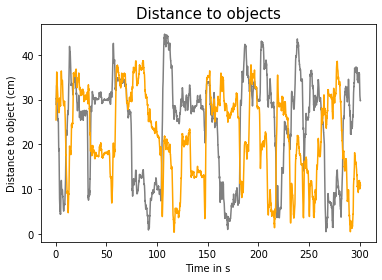

In [56]:
plt.plot(d['time in s'], centroid['centroid_distance1'], color='grey')
plt.plot(d['time in s'], centroid['centroid_distance2'], color='orange')
plt.xlabel('Time in s')
plt.ylabel('Distance to object (cm)')
plt.title('Distance to objects', fontsize = 15)
plt.show()

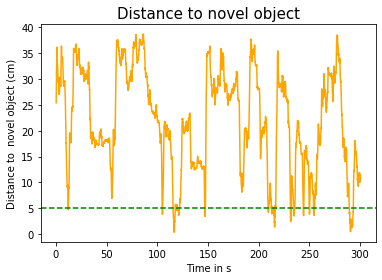

In [57]:
#plot with 5cm threshold visualized
plt.plot(d['time in s'], centroid['centroid_distance2'], color='orange')
plt.axhline(y = 5, color='green', linestyle='--', linewidth=1.5)
plt.xlabel('Time in s')
plt.ylabel('Distance to  novel object (cm)')
plt.title('Distance to novel object', fontsize = 15)
plt.show()

In [58]:
#time near object1
time1 = centroid[centroid["centroid_distance1"] < 3.5].count()["centroid_distance1"]

#time near object2
time2 = centroid[centroid["centroid_distance2"] < 3.5].count()["centroid_distance2"]
centroid['time_at_object1'] = time1 / framerate
centroid['time_at_object2'] = time2 / framerate

In [59]:
#visits
#get rows close to object 1
object1 = centroid[~(centroid['centroid_distance1'] > 3.5)]  

# get indices
r =[]
for i in object1.index: 
    r.append(i)
#print(r, end = " ") 

index=np.array(r)
len(index)

#get number of jumps
count = []
prev = index[0]
for a in index[1:]:
    if prev+1 != a+1:
        count.append(a)
    prev = a+1
    #print(count)
    
visits1= len(count)
visits1


#get rows close to object 2
object2 = centroid[~(centroid['centroid_distance2'] > 3.5)]  

# get indices
r2 =[]
for i in object2.index: 
    r2.append(i)
#print(r2, end = " ") 

index2=np.array(r2)
len(index2)

#get number of jumps
count2 = []
prev2 = index2[0]
for b in index2[1:]:
    if prev2+1 != b+1:
        count2.append(b)
    prev2 = b+1
    #print(count2)
    
visits2= len(count2)

centroid['visit1']=visits1
centroid['visit2']=visits2

In [60]:
del centroid['old_position_y']
del centroid['old_position_x']
del centroid['change_in_distance_y']
del centroid['change_in_distance_x']
del centroid['object1_y']
del centroid['object1_x']
del centroid['object2_y']
del centroid['object2_x']

In [61]:
centroid

,centroid_x,centroid_y,bodycenter_x,bodycenter_y,nose_x,nose_y,Angles1,Angles2,centroid_distance1,centroid_distance2,body_distance1,body_distance2,time_at_object1,time_at_object2,visit1,visit2
0,72.705773,19.357445,70.981416,22.611739,662.684387,165.195755,110.35,165.16,28.928425,25.442638,27.735129,21.879861,8.133333,6.333333,7,5
1,73.044375,18.834134,71.333239,22.030644,663.121399,160.276413,97.96,151.54,29.226969,26.073474,27.965490,22.558733,8.133333,6.333333,7,5
2,73.268409,18.316873,71.551081,21.510904,664.089539,155.501343,93.13,146.00,29.433237,26.631388,28.101086,23.107046,8.133333,6.333333,7,5
3,73.530923,17.972336,71.737532,21.053450,665.837219,153.569977,91.06,143.17,29.694456,27.061947,28.222939,23.567805,8.133333,6.333333,7,5
4,73.878128,17.709098,71.878532,20.665731,669.042603,152.479523,92.95,144.34,30.028312,27.483048,28.304336,23.944271,8.133333,6.333333,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9006,48.337391,46.421760,51.474087,45.465806,425.596863,422.323517,92.18,143.05,30.058014,11.021400,29.746204,8.334815,8.133333,6.333333,7,5
9007,48.332368,46.315047,51.471462,45.408071,425.594421,420.924469,90.15,141.39,29.949489,10.949481,29.687034,8.288156,8.133333,6.333333,7,5
9008,48.180408,46.190025,51.400831,45.357949,423.397247,418.509674,83.87,135.21,29.801115,10.987159,29.616281,8.316901,8.133333,6.333333,7,5
9009,48.280678,46.092048,51.461471,45.358959,424.225616,417.018402,80.83,132.64,29.715885,10.826027,29.631292,8.248616,8.133333,6.333333,7,5


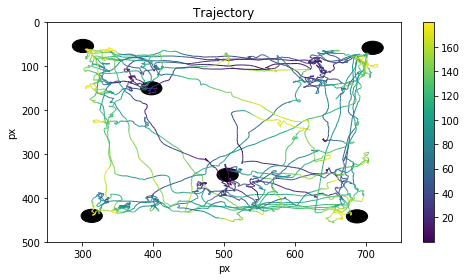

In [62]:
x = centroid['centroid_x'] * px
y = centroid['centroid_y'] * px
v = centroid['Angles1']

#Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(7,4))

#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
corner1 = plt.Circle((upright_x,upright_y), 15, color='black')
corner2 = plt.Circle((upleft_x,upleft_y), 15, color='black')
corner3 = plt.Circle((lowleft_x,lowleft_y), 15, color='black')
corner4 = plt.Circle((lowright_x,lowright_y), 15, color='black')
object1 = plt.Circle((object1_x,object1_y), 15, color='black')
object2 = plt.Circle((object2_x,object2_y), 15, color='black')
ax.add_artist(corner1)
ax.add_artist(corner2)
ax.add_artist(corner3)
ax.add_artist(corner4)
ax.add_artist(object1)
ax.add_artist(object2)
plt.gca().invert_yaxis()

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(v.min(), v.max())
#norm = plt.Normalize(v.min(), 10)
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(v)
lc.set_linewidth(1)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)

# Setting lim here is important, otherwise can't show fig properly
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

plt.xlim(250,750)
plt.ylim(0,500)

plt.xlabel('px')
plt.ylabel('px')
plt.title('Trajectory')

plt.gca().invert_yaxis() # Just to align the plot with real camera settings
#plt.title(str(Path(video).stem)+' '+bpt+' trajectory with velocity')
plt.tight_layout()
plt.show()